In [2]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
from sklearn.preprocessing import StandardScaler

df['Genre'].replace(['Male','Female'], [0,1], inplace=True)
df.drop("CustomerID", axis=1, inplace=True)
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [4]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=3)
pca.fit(df_std)
df_std = pca.transform(df_std)

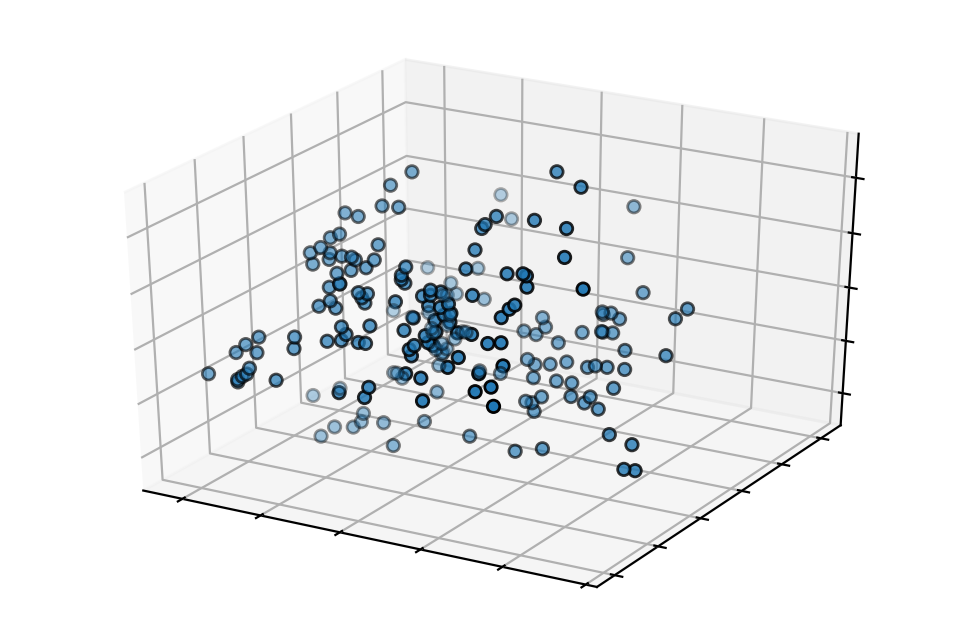

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_std[:, 0], df_std[:, 1], df_std[:, 2], cmap=plt.cm.nipy_spectral, edgecolor="k")
fig.dpi = 200
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

In [6]:
from sklearn.cluster import KMeans
from sklearn import metrics

distortions = []
for i in range(1, 15):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_std)
    distortions.append(km.inertia_)

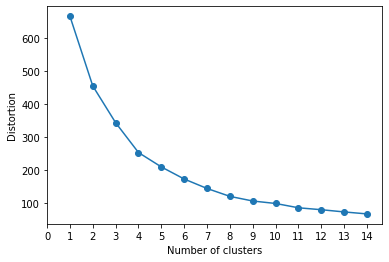

In [7]:
import numpy as np

plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.xticks(np.arange(0, 15, step=1))
plt.show()